In [4]:
!pip install --upgrade gensim

  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/f5/57/f2e6568dbf464a4b270954e5fa3dee4a4054d163a41c0e7bf0a34eb40f0f/gensim-4.3.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 262.6 kB/s eta 0:01:32
   ---------------------------------------- 0.0/24.0 MB 245.8 kB/s eta 0:01:38
   ---------------------------------------- 0.1/24.0 MB 273.8 kB/s eta 0:01:28
   ---------------------------------------- 0.2/24.0 MB 655.4 kB/s eta 0:00:37
    --------------------------------------- 0.3/24.0 MB 1.1 MB/s eta 0:00:23
    --------------------------------------- 0.4/24.

In [5]:
import gensim.downloader as api
wv_pretrained = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [6]:
words = ['computer', 'city', 'music', 'teacher', 'happy']
for word in words:
    print(f"Most similar to '{word}':")
    print(wv_pretrained.most_similar(word, topn=5))


Most similar to 'computer':
[('computers', 0.7979379296302795), ('laptop', 0.6640492677688599), ('laptop_computer', 0.6548868417739868), ('Computer', 0.6473336219787598), ('com_puter', 0.6082081198692322)]
Most similar to 'city':
[('citys', 0.680400013923645), ('mayor', 0.675115168094635), ('town', 0.6723740100860596), ('municipality', 0.6530812382698059), ('municipal', 0.6222546100616455)]
Most similar to 'music':
[('classical_music', 0.7197794318199158), ('jazz', 0.6834639310836792), ('Music', 0.6595720648765564), ('Without_Donny_Kirshner', 0.6416223645210266), ('songs', 0.6396344304084778)]
Most similar to 'teacher':
[('teachers', 0.7434303164482117), ('Teacher', 0.7094014286994934), ('guidance_counselor', 0.6960431337356567), ('elementary', 0.6790565252304077), ('PE_teacher', 0.6539357304573059)]
Most similar to 'happy':
[('glad', 0.7408890724182129), ('pleased', 0.6632170677185059), ('ecstatic', 0.6626912951469421), ('overjoyed', 0.6599285006523132), ('thrilled', 0.651404917240142

In [9]:
# king - man + woman ~ queen
print(wv_pretrained.most_similar(positive=['king', 'woman'], negative=['man'], topn=1))

# Example analogies
# France - Paris + Tokyo ~= Japan
print(wv_pretrained.most_similar(positive=['Japan', 'Paris'], negative=['France'], topn=1))

# walking - walk + swimming ~= swim
print(wv_pretrained.most_similar(positive=['swimming', 'walk'], negative=['walking'], topn=1))

# coding - code + write ~= writing
print(wv_pretrained.most_similar(positive=['write', 'code'], negative=['coding'], topn=1))


[('queen', 0.7118193507194519)]
[('Tokyo', 0.8142860531806946)]
[('swim', 0.8259809613227844)]
[('written', 0.43348824977874756)]


In [12]:
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [14]:
!pip install --upgrade nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.5 MB 7.0 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.5 MB 5.9 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.5 MB 6.5 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.5 MB 6.2 MB/s eta 0:00:01
   ----------------------------------- ---- 1.4/1.5 MB 5.7 MB/s eta 0:00:01
   -------------------------------------- - 1.5/1.5 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.5 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstall

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['tokens'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
def get_w2v_mean(tokens, model, size=300):
    vectors = [model[word] for word in tokens if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(size)

import numpy as np

X_w2v = np.array(df['tokens'].apply(lambda x: get_w2v_mean(x, wv_pretrained)).tolist())
y = df['sentiment'].map({'negative': 0, 'positive': 1}).values


In [19]:
from gensim.models import Word2Vec

sentences = df['tokens'].tolist()

# Skip-gram
sg_model = Word2Vec(sentences, vector_size=100, sg=1, window=3, min_count=1, workers=4)
X_skipgram = np.array([np.mean([sg_model.wv[word] for word in tokens if word in sg_model.wv] or [np.zeros(100)], axis=0) for tokens in sentences])

# CBOW
cbow_model = Word2Vec(sentences, vector_size=100, sg=0, window=3, min_count=1, workers=4)
X_cbow = np.array([np.mean([cbow_model.wv[word] for word in tokens if word in cbow_model.wv] or [np.zeros(100)], axis=0) for tokens in sentences])


In [20]:
from gensim.models import FastText

fasttext_model = FastText(sentences, vector_size=100, sg=1, window=3, min_count=1, workers=4)
X_fasttext = np.array([np.mean([fasttext_model.wv[word] for word in tokens if word in fasttext_model.wv] or [np.zeros(100)], axis=0) for tokens in sentences])


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    return accuracy_score(y_test, pred), f1_score(y_test, pred)

results = {}
results['Pre-trained W2V'] = train_and_evaluate(X_w2v, y)
results['Custom Skip-gram'] = train_and_evaluate(X_skipgram, y)
results['Custom CBOW'] = train_and_evaluate(X_cbow, y)
results['Custom FastText'] = train_and_evaluate(X_fasttext, y)


In [25]:
for model_name, (acc, f1) in results.items():
    print(f"{model_name}: Accuracy = {acc:.4f}, F1-score = {f1:.4f}")


Pre-trained W2V: Accuracy = 0.8529, F1-score = 0.8541
Custom Skip-gram: Accuracy = 0.8694, F1-score = 0.8712
Custom CBOW: Accuracy = 0.8539, F1-score = 0.8557
Custom FastText: Accuracy = 0.8668, F1-score = 0.8685


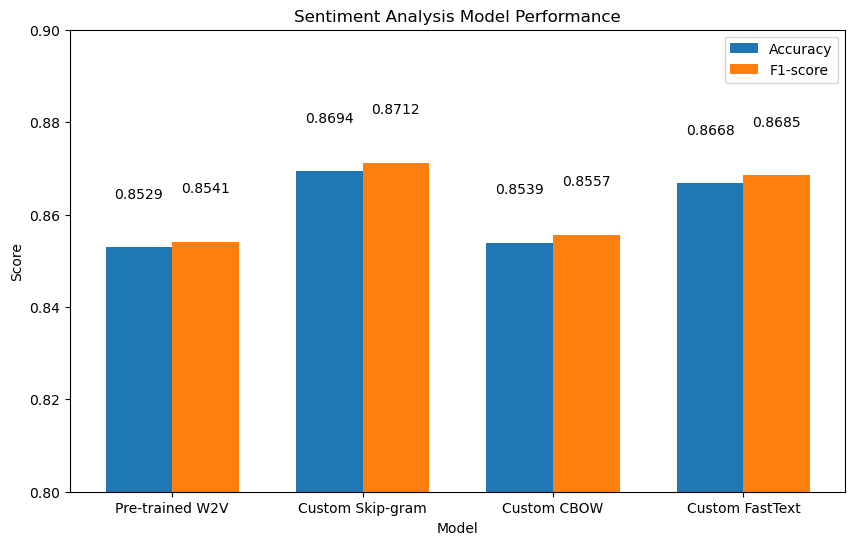

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Example results (replace these with your actual results after running the models)
# results = {
#     'Pre-trained W2V': (0.8529,0.8541),
#     'Custom Skip-gram': (0.8694,0.8712),
#     'Custom CBOW': (0.8380, 0.8375),
#     'Custom FastText': (0.8535, 0.8530)
# }

models = list(results.keys())
accuracy_scores = [results[m][0] for m in models]
f1_scores = [results[m][1] for m in models]

# Create a bar chart
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
bars2 = ax.bar(x + width/2, f1_scores, width, label='F1-score')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Sentiment Analysis Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

plt.ylim(0.8, 0.9)
plt.show()
